<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [38]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")

same class of data - impurity
measured by entropy
*gini index
*information gain

entropy is o if all are of same class
enropy: >0.5 (low entropy)
        < 0.5 (high entropy)

    we consider only high information gain
    we split node which has high information gain.

Gini inndex is faster than information gain(entropy)

In [4]:
df.head(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0


In [6]:
df.isna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [7]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
395,False
396,False
397,False
398,False


In [20]:
x = df.iloc[:, 2:4].values   # all rows, columns 2 to 3
y = df.iloc[:, -1].values   # all rows, last column


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = "entropy",
    max_depth = 4
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
y_pred = classifier.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9125


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[47  5]
 [ 2 26]]


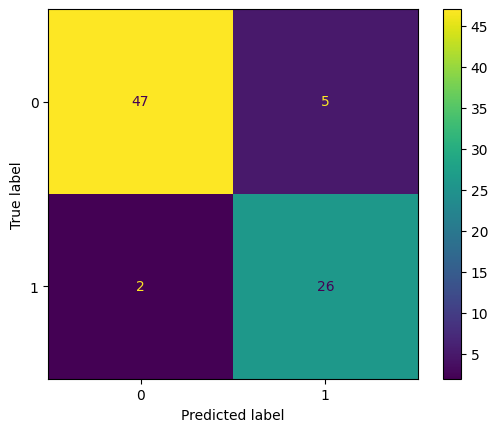

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


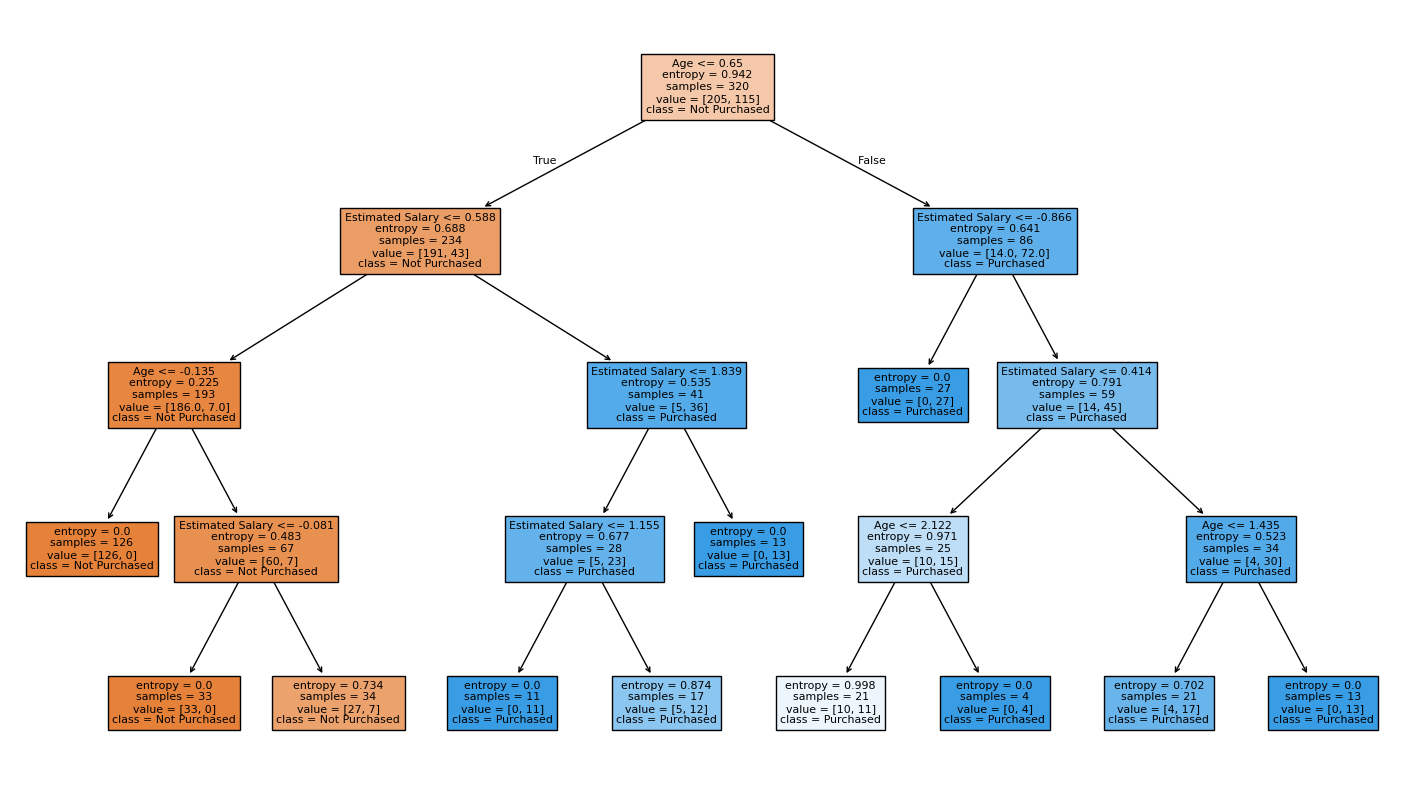

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names = ["Age","Estimated Salary"],
    class_names = ["Not Purchased","Purchased"],
    filled = True,
    rounded = False
)
plt.show()

if only some columns needed - hyper parameters

max_depth = 4